# **Coursework 2 - Part A: Binary Classification**
## Problem Description
In this part of the coursework, we aim to design and implement a machine learning technique to classify system traces as normal events or abnormal data injection attack events based on the provided training data.

## Approach
We will utilize three machine learning algorithms:
1. Random Forest Classifier
2. Gradient Boosting Classifier
3. Decision Tree Classifier

Each algorithm will be trained on the training data and used to predict labels for the testing data.

---

## **Decision Tree Classifier**
**WITH THIS METHOD I ACHIEVED AN ACCURACY SCORE OF 96.8%**

Accuracy Score 0.9675
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       589
           1       0.97      0.97      0.97       611

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



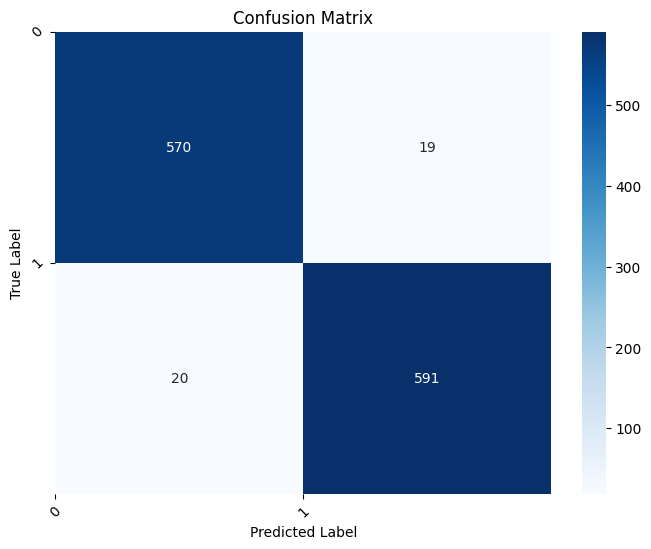

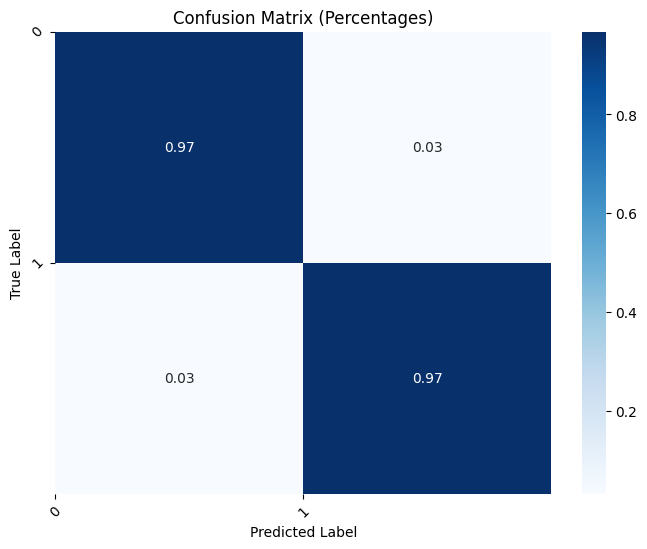

      R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V    R1-PA3:VH  \
0    108.386426  131835.2537  -11.573747  131810.1804  -131.579758   
1    107.824928  131634.6675  -12.135246  131609.5942  -132.141256   
2     107.37802  131760.0339  -12.582153  131734.9606  -132.588163   
3    107.337913  131810.1804  -12.616531  131760.0339   -132.62827   
4    107.297806  131835.2537  -12.662367  131810.1804  -132.668377   
..          ...          ...         ...          ...          ...   
95   -138.46671  132286.5725  101.562499  132261.4993   -18.443511   
96  -138.151584  131935.5467  101.871896  131885.4002   -18.122655   
97  -138.220339  131885.4002  101.803141  131835.2537   -18.202869   
98  -138.289093  131860.3269  101.734386  131835.2537   -18.260165   
99  -138.386496  131835.2537  101.636983  131810.1804   -18.369027   

       R1-PM3:V    R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0   131885.4002   114.643125  302.49772  -12.421725  333.80953  ...   
1    131684.814  

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

class DecisionTreeBinaryClassifier:
    def __init__(self, train_file, test_file):
        """
        Initialize the DecisionTreeBinaryClassifier class.

        Parameters:
        - train_file (str): File path for the training data.
        - test_file (str): File path for the testing data.
        """
        self.train_file = train_file
        self.test_file = test_file
        self.model = DecisionTreeClassifier()

    def load_data(self, file):
        """
        Load data from a CSV file, skipping the first row.

        Parameters:
        - file (str): File path for the CSV file.

        Returns:
        - data (DataFrame): Loaded data as a pandas DataFrame.
        """
        # Set the data types for each column
        column_dtypes = [str] * 128  # Set first 128 to strings
        column_dtypes.append(int)  # Set the 129th column (index 128) as int
        data = pd.read_csv(file, sep=',', header=None, dtype=dict(zip(range(129), column_dtypes)), skiprows=1)
        return data

    def split_data(self, data):
        """
        Split features and labels.

        Parameters:
        - data (DataFrame): Input data containing features and labels.

        Returns:
        - X_train, X_test, y_train, y_test (DataFrame): Split features and labels for training and testing.
        """
        X = data.iloc[:, :-1]
        y = data.iloc[:, -1]
        return train_test_split(X, y, test_size=0.2, random_state=42)

    def train(self, X, y):
        """
        Train the classifier.

        Parameters:
        - X (DataFrame): Features for training.
        - y (Series): Labels for training.
        """
        self.model.fit(X, y)

    def evaluate(self, X, y):
        """
        Evaluate the trained model.

        Parameters:
        - X (DataFrame): Features for evaluation.
        - y (Series): True labels for evaluation.
        """
        pred = self.model.predict(X)

        # Print accuracy score and classification report
        print(f'Accuracy Score {accuracy_score(y, pred)}')
        print(classification_report(y, pred))

        # Generate confusion matrix
        conf_matrix = confusion_matrix(y, pred)

        # Extract unique labels from the data
        unique_labels = np.unique(np.concatenate((y, pred)))

        # Plot regular confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
        plt.title('Confusion Matrix')
        plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.yticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Calculate percentages
        conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

        # Plot confusion matrix with percentages
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_percentage, annot=True, cmap='Blues', fmt='.2f')
        plt.title('Confusion Matrix (Percentages)')
        plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.yticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()


    def predict(self, data):
      """
      Make predictions on new data.

      Parameters:
      - data (DataFrame): New data for prediction.

      Returns:
      - predicted_data (DataFrame): DataFrame with predicted labels.
      """
      features = data.copy()
      predictions = self.model.predict(features)
      predictions = predictions.astype(int)  # Convert predictions to integers

      # Get the first header row from the test file
      with open(self.test_file, 'r') as file:
          header_row = file.readline().strip().split(',')

      # Create a new DataFrame for the predicted results
      predicted_data = pd.concat([features, pd.DataFrame(predictions, columns=['marker'])], axis=1)

      # Prepend the header row to the predicted data
      header_row.append('marker')  # Add the "Predicted" column to the header row
      predicted_data.columns = header_row

      predicted_data.to_csv('TestingResultsBinary.csv', index=False)
      print(predicted_data)

      return predicted_data  # Return the DataFrame with the 'Predicted' column

    def run(self):
        """Run the classifier."""
        # Load training data and split into features and labels
        train_data = self.load_data(self.train_file)
        X_train, X_test, y_train, y_test = self.split_data(train_data)

        # Train the classifier
        self.train(X_train, y_train)

        # Evaluate the model on test data
        self.evaluate(X_test, y_test)

        # Load testing data and make predictions
        test_data = self.load_data(self.test_file)
        predicted_data = self.predict(test_data)  # Capture the returned DataFrame

        # Select the 'Predicted' column and write it to a new CSV file
        predicted_column = predicted_data.iloc[:, -1]  # Select the last column
        predicted_values = [str(value) for value in predicted_column if str(value) != 'nan']  # Filter out empty values
        print("Predicted Markers\n" + ', '.join(predicted_values))  # Join with commas

if __name__ == "__main__":
    # Initialize and run the classifier
    classifier = DecisionTreeBinaryClassifier('TrainingDataBinary.csv', 'TestingDataBinary.csv')
    classifier.run()

---

## **Gradient Boosting Classifier**

 **WITH THIS METHOD I ACHIEVED AN ACCURACY SCORE OF 94.2%**

Accuracy Score 0.9416666666666667
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       589
           1       0.94      0.95      0.94       611

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



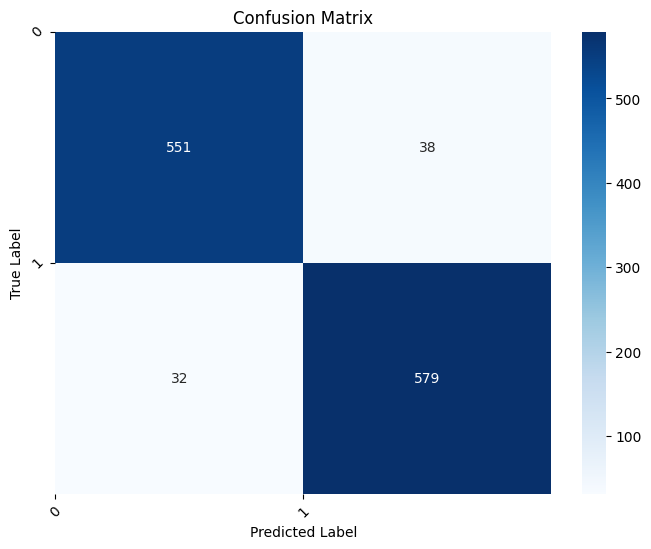

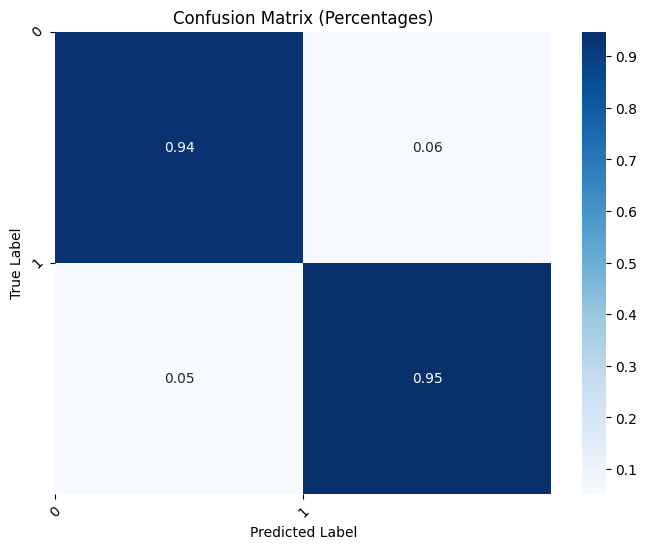

      R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V    R1-PA3:VH  \
0    108.386426  131835.2537  -11.573747  131810.1804  -131.579758   
1    107.824928  131634.6675  -12.135246  131609.5942  -132.141256   
2     107.37802  131760.0339  -12.582153  131734.9606  -132.588163   
3    107.337913  131810.1804  -12.616531  131760.0339   -132.62827   
4    107.297806  131835.2537  -12.662367  131810.1804  -132.668377   
..          ...          ...         ...          ...          ...   
95   -138.46671  132286.5725  101.562499  132261.4993   -18.443511   
96  -138.151584  131935.5467  101.871896  131885.4002   -18.122655   
97  -138.220339  131885.4002  101.803141  131835.2537   -18.202869   
98  -138.289093  131860.3269  101.734386  131835.2537   -18.260165   
99  -138.386496  131835.2537  101.636983  131810.1804   -18.369027   

       R1-PM3:V    R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0   131885.4002   114.643125  302.49772  -12.421725  333.80953  ...   
1    131684.814  

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

class GradientBoostingBinaryClassifier:
    def __init__(self, train_file, test_file):
        """
        Initialize the GradientBoostingBinaryClassifier.

        Parameters:
        - train_file (str): File path of the training data.
        - test_file (str): File path of the testing data.
        """
        self.train_file = train_file
        self.test_file = test_file
        self.model = GradientBoostingClassifier()


    def load_data(self, file):
        """
        Load data from a CSV file, skipping the first row.

        Parameters:
        - file (str): File path for the CSV file.

        Returns:
        - data (DataFrame): Loaded data as a pandas DataFrame.
        """
        # Set the data types for each column
        column_dtypes = [str] * 128  # Set first 128 to strings
        column_dtypes.append(int)  # Set the 129th column (index 128) as int
        data = pd.read_csv(file, sep=',', header=None, dtype=dict(zip(range(129), column_dtypes)), skiprows=1)
        return data

    def split_data(self, data):
        """
        Split features and labels.

        Parameters:
        - data (DataFrame): Input data containing features and labels.

        Returns:
        - X_train, X_test, y_train, y_test (DataFrame): Split features and labels for training and testing.
        """
        X = data.iloc[:, :-1]
        y = data.iloc[:, -1]
        return train_test_split(X, y, test_size=0.2, random_state=42)

    def train(self, X, y):
        """
        Train the classifier.

        Parameters:
        - X (DataFrame): Features for training.
        - y (Series): Labels for training.
        """
        self.model.fit(X, y)

    def evaluate(self, X, y):
        """
        Evaluate the trained model.

        Parameters:
        - X (DataFrame): Features for evaluation.
        - y (Series): True labels for evaluation.
        """
        pred = self.model.predict(X)

        # Print accuracy score and classification report
        print(f'Accuracy Score {accuracy_score(y, pred)}')
        print(classification_report(y, pred))

        # Generate confusion matrix
        conf_matrix = confusion_matrix(y, pred)

        # Extract unique labels from the data
        unique_labels = np.unique(np.concatenate((y, pred)))

        # Plot regular confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
        plt.title('Confusion Matrix')
        plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.yticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Calculate percentages
        conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

        # Plot confusion matrix with percentages
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_percentage, annot=True, cmap='Blues', fmt='.2f')
        plt.title('Confusion Matrix (Percentages)')
        plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.yticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()


    def predict(self, data):
      """
      Make predictions on new data.

      Parameters:
      - data (DataFrame): New data for prediction.

      Returns:
      - predicted_data (DataFrame): DataFrame with predicted labels.
      """
      features = data.copy()
      predictions = self.model.predict(features)
      predictions = predictions.astype(int)  # Convert predictions to integers

      # Get the first header row from the test file
      with open(self.test_file, 'r') as file:
          header_row = file.readline().strip().split(',')

      # Create a new DataFrame for the predicted results
      predicted_data = pd.concat([features, pd.DataFrame(predictions, columns=['marker'])], axis=1)

      # Prepend the header row to the predicted data
      header_row.append('marker')  # Add the "Predicted" column to the header row
      predicted_data.columns = header_row

      predicted_data.to_csv('TestingResultsBinary.csv', index=False)

      print(predicted_data)

      return predicted_data  # Return the DataFrame with the 'Predicted' column


    def run(self):
        """Run the classifier."""
        # Load training data and split into features and labels
        train_data = self.load_data(self.train_file)
        X_train, X_test, y_train, y_test = self.split_data(train_data)

        # Train the classifier
        self.train(X_train, y_train)

        # Evaluate the model on test data
        self.evaluate(X_test, y_test)

        # Load testing data and make predictions
        test_data = self.load_data(self.test_file)
        predicted_data = self.predict(test_data)  # Capture the returned DataFrame

        # Select the 'Predicted' column and write it to a new CSV file
        predicted_column = predicted_data.iloc[:, -1]  # Select the last column
        predicted_values = [str(value) for value in predicted_column if str(value) != 'nan']  # Filter out empty values
        print("Predicted Markers\n" + ', '.join(predicted_values))  # Join with commas

if __name__ == "__main__":
    classifier = GradientBoostingBinaryClassifier('TrainingDataBinary.csv', 'TestingDataBinary.csv')
    classifier.run()


---

## **Random Forest Classifier Implementation**

**WITH THIS METHOD I ACHIEVED AN ACCURACY SCORE OF 98.9%**

Accuracy Score 0.9883333333333333
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       589
           1       0.98      1.00      0.99       611

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



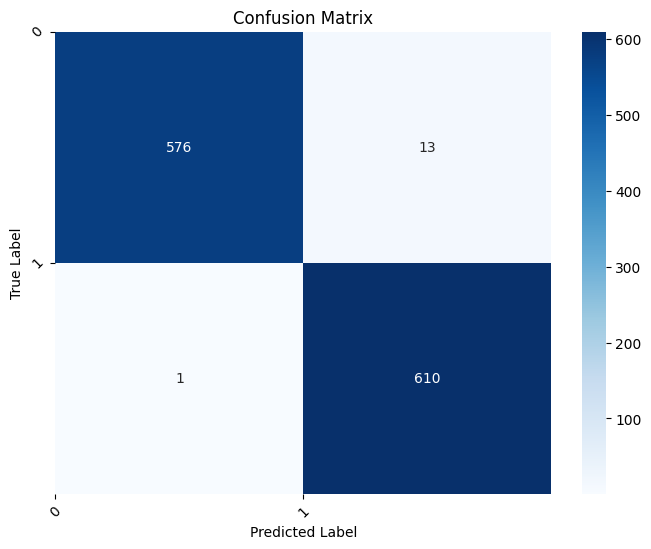

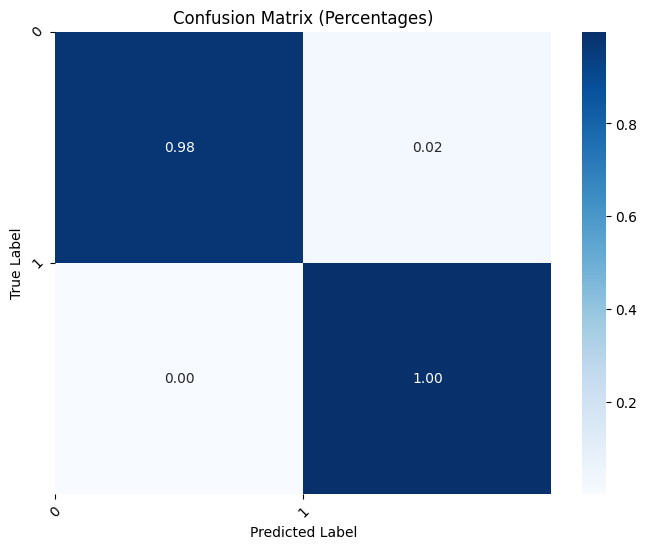

      R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V    R1-PA3:VH  \
0    108.386426  131835.2537  -11.573747  131810.1804  -131.579758   
1    107.824928  131634.6675  -12.135246  131609.5942  -132.141256   
2     107.37802  131760.0339  -12.582153  131734.9606  -132.588163   
3    107.337913  131810.1804  -12.616531  131760.0339   -132.62827   
4    107.297806  131835.2537  -12.662367  131810.1804  -132.668377   
..          ...          ...         ...          ...          ...   
95   -138.46671  132286.5725  101.562499  132261.4993   -18.443511   
96  -138.151584  131935.5467  101.871896  131885.4002   -18.122655   
97  -138.220339  131885.4002  101.803141  131835.2537   -18.202869   
98  -138.289093  131860.3269  101.734386  131835.2537   -18.260165   
99  -138.386496  131835.2537  101.636983  131810.1804   -18.369027   

       R1-PM3:V    R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0   131885.4002   114.643125  302.49772  -12.421725  333.80953  ...   
1    131684.814  

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

class RandomForestBinaryClassifier:
    def __init__(self, train_file, test_file):
        """
        Initialize the RandomForestBinaryClassifier.

        Parameters:
        - train_file (str): File path of the training data.
        - test_file (str): File path of the testing data.
        """
        self.train_file = train_file
        self.test_file = test_file
        self.model = RandomForestClassifier()


    def load_data(self, file):
        """
        Load data from a CSV file, skipping the first row.

        Parameters:
        - file (str): File path for the CSV file.

        Returns:
        - data (DataFrame): Loaded data as a pandas DataFrame.
        """
        # Set the data types for each column
        column_dtypes = [str] * 128  # Set first 128 to strings
        column_dtypes.append(int)  # Set the 129th column (index 128) as int
        data = pd.read_csv(file, sep=',', header=None, dtype=dict(zip(range(129), column_dtypes)), skiprows=1)
        return data

    def split_data(self, data):
        """
        Split features and labels.

        Parameters:
        - data (DataFrame): Input data containing features and labels.

        Returns:
        - X_train, X_test, y_train, y_test (DataFrame): Split features and labels for training and testing.
        """
        X = data.iloc[:, :-1]
        y = data.iloc[:, -1]
        return train_test_split(X, y, test_size=0.2, random_state=42)

    def train(self, X, y):
        """
        Train the classifier.

        Parameters:
        - X (DataFrame): Features for training.
        - y (Series): Labels for training.
        """
        self.model.fit(X, y)

    def evaluate(self, X, y):
        """
        Evaluate the trained model.

        Parameters:
        - X (DataFrame): Features for evaluation.
        - y (Series): True labels for evaluation.
        """
        pred = self.model.predict(X)

        # Print accuracy score and classification report
        print(f'Accuracy Score {accuracy_score(y, pred)}')
        print(classification_report(y, pred))

        # Generate confusion matrix
        conf_matrix = confusion_matrix(y, pred)

        # Extract unique labels from the data
        unique_labels = np.unique(np.concatenate((y, pred)))

        # Plot regular confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
        plt.title('Confusion Matrix')
        plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.yticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Calculate percentages
        conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

        # Plot confusion matrix with percentages
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_percentage, annot=True, cmap='Blues', fmt='.2f')
        plt.title('Confusion Matrix (Percentages)')
        plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.yticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()


    def predict(self, data):
      """
      Make predictions on new data.

      Parameters:
      - data (DataFrame): New data for prediction.

      Returns:
      - predicted_data (DataFrame): DataFrame with predicted labels.
      """
      features = data.copy()
      predictions = self.model.predict(features)
      predictions = predictions.astype(int)  # Convert predictions to integers

      # Get the first header row from the test file
      with open(self.test_file, 'r') as file:
          header_row = file.readline().strip().split(',')

      # Create a new DataFrame for the predicted results
      predicted_data = pd.concat([features, pd.DataFrame(predictions, columns=['marker'])], axis=1)

      # Prepend the header row to the predicted data
      header_row.append('marker')  # Add the "Predicted" column to the header row
      predicted_data.columns = header_row

      predicted_data.to_csv('TestingResultsBinary.csv', index=False)

      print(predicted_data)

      return predicted_data  # Return the DataFrame with the 'Predicted' column

    def run(self):
        """Run the classifier."""
        # Load training data and split into features and labels
        train_data = self.load_data(self.train_file)
        X_train, X_test, y_train, y_test = self.split_data(train_data)

        # Train the classifier
        self.train(X_train, y_train)

        # Evaluate the model on test data
        self.evaluate(X_test, y_test)

        # Load testing data and make predictions
        test_data = self.load_data(self.test_file)
        predicted_data = self.predict(test_data)  # Capture the returned DataFrame

        # Select the 'Predicted' column and write it to a new CSV file
        predicted_column = predicted_data.iloc[:, -1]  # Select the last column
        predicted_values = [str(value) for value in predicted_column if str(value) != 'nan']  # Filter out empty values
        print("Predicted Markers\n" + ', '.join(predicted_values))  # Join with commas

if __name__ == "__main__":
    classifier = RandomForestBinaryClassifier('TrainingDataBinary.csv', 'TestingDataBinary.csv')
    classifier.run()


---

## **Results and Analysis**

## Accuracy Scores
1. Random Forest Classifier 98.9%
2. Gradient Boosting Classifier 94.2%
3. Decision Tree Classifier 96.6%

# **Best model is:** Random Forest Classifier with an accuracy score of 98.9%

---

# **Coursework 2 - Part B: Multi-Class Classification**
## Problem Description
In this part of the coursework, we aim to design and implement a machine learning technique to classify system traces into three classes: normal events, abnormal data injection attack events, and abnormal command injection attack events based on the provided training data.

## Approach
We will utilize three machine learning algorithms:
1. Random Forest Classifier
2. Gradient Boosting Classifier
3. Decision Tree Classifier

Each algorithm will be trained on the training data and used to predict labels for the testing data.

---

## **Decision Tree Classifier**

**WITH THIS METHOD I ACHIEVED AN ACCURACY SCORE OF 90.7%**

Accuracy Score 0.9066666666666666
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       398
           1       0.90      0.89      0.89       393
           2       0.89      0.87      0.88       409

    accuracy                           0.91      1200
   macro avg       0.91      0.91      0.91      1200
weighted avg       0.91      0.91      0.91      1200



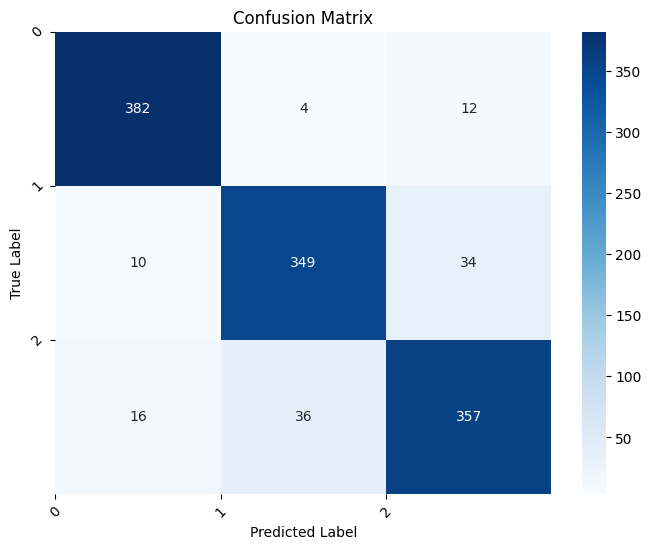

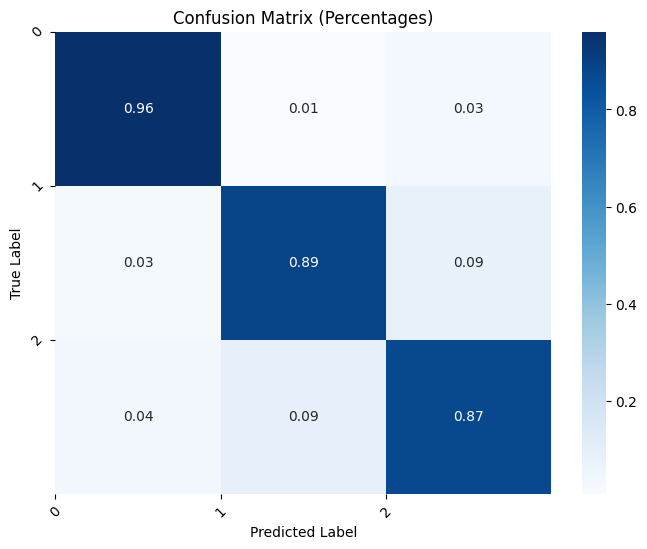

      R1-PA1:VH     R1-PM1:V    R1-PA2:VH     R1-PM2:V  R1-PA3:VH  \
0    -34.377468  130932.6159   -154.36056  130882.4694  85.640002   
1    -34.451952  130932.6159  -154.429315  130907.5427  85.576976   
2    -34.492059  130932.6159  -154.475151  130882.4694   85.53114   
3    -34.555085  130932.6159  -154.532447  130907.5427  85.462385   
4    -34.658217  130957.6892  -154.641309  130882.4694  85.353523   
..          ...          ...          ...          ...        ...   
95  -102.983434  131383.9348   137.040045  131333.7883  17.028306   
96  -104.003299  131183.3486   136.020181  131158.2754  16.008441   
97   -104.67366  131108.1288    135.34982  131083.0556   15.34381   
98  -104.719496  131108.1288   135.298254  131108.1288  15.297973   
99  -104.793981  131158.2754   135.229499  131133.2021  15.223489   

       R1-PM3:V    R1-PA4:IH   R1-PM4:I    R1-PA5:IH   R1-PM5:I  ...  \
0   130982.7625   -38.336606   483.4104  -158.852549  484.50906  ...   
1   130982.7625   -38.53141

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

class DecisionTreeMultiClassifier:
    def __init__(self, train_file, test_file):
        """
        Initialize the DecisionTreeMultiClassifier.

        Parameters:
        - train_file (str): File path of the training data.
        - test_file (str): File path of the testing data.
        """
        self.train_file = train_file
        self.test_file = test_file
        self.model = DecisionTreeClassifier()

    def load_data(self, file):
        """
        Load data from a CSV file, skipping the first row.

        Parameters:
        - file (str): File path for the CSV file.

        Returns:
        - data (DataFrame): Loaded data as a pandas DataFrame.
        """
        # Set the data types for each column
        column_dtypes = [str] * 128  # Set first 128 to strings
        column_dtypes.append(int)  # Set the 129th column (index 128) as int
        data = pd.read_csv(file, sep=',', header=None, dtype=dict(zip(range(129), column_dtypes)), skiprows=1)
        return data

    def split_data(self, data):
        """
        Split features and labels.

        Parameters:
        - data (DataFrame): Input data containing features and labels.

        Returns:
        - X_train, X_test, y_train, y_test (DataFrame): Split features and labels for training and testing.
        """
        X = data.iloc[:, :-1]
        y = data.iloc[:, -1]
        return train_test_split(X, y, test_size=0.2, random_state=42)

    def train(self, X, y):
        """
        Train the classifier.

        Parameters:
        - X (DataFrame): Features for training.
        - y (Series): Labels for training.
        """
        self.model.fit(X, y)

    def evaluate(self, X, y):
        """
        Evaluate the trained model.

        Parameters:
        - X (DataFrame): Features for evaluation.
        - y (Series): True labels for evaluation.
        """
        pred = self.model.predict(X)

        # Print accuracy score and classification report
        print(f'Accuracy Score {accuracy_score(y, pred)}')
        print(classification_report(y, pred))

        # Generate confusion matrix
        conf_matrix = confusion_matrix(y, pred)

        # Extract unique labels from the data
        unique_labels = np.unique(np.concatenate((y, pred)))

        # Plot regular confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
        plt.title('Confusion Matrix')
        plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.yticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Calculate percentages
        conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

        # Plot confusion matrix with percentages
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_percentage, annot=True, cmap='Blues', fmt='.2f')
        plt.title('Confusion Matrix (Percentages)')
        plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.yticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()


    def predict(self, data):
      """
      Make predictions on new data.

      Parameters:
      - data (DataFrame): New data for prediction.

      Returns:
      - predicted_data (DataFrame): DataFrame with predicted labels.
      """
      features = data.copy()
      predictions = self.model.predict(features)
      predictions = predictions.astype(int)  # Convert predictions to integers

      # Get the first header row from the test file
      with open(self.test_file, 'r') as file:
          header_row = file.readline().strip().split(',')

      # Create a new DataFrame for the predicted results
      predicted_data = pd.concat([features, pd.DataFrame(predictions, columns=['marker'])], axis=1)

      # Prepend the header row to the predicted data
      header_row.append('marker')  # Add the "Predicted" column to the header row
      predicted_data.columns = header_row

      predicted_data.to_csv('TestingResultsMulti.csv', index=False)

      print(predicted_data)

      return predicted_data  # Return the DataFrame with the 'Predicted' column


    def run(self):
        """Run the classifier."""
        # Load training data and split into features and labels
        train_data = self.load_data(self.train_file)
        X_train, X_test, y_train, y_test = self.split_data(train_data)

        # Train the classifier
        self.train(X_train, y_train)

        # Evaluate the model on test data
        self.evaluate(X_test, y_test)

        # Load testing data and make predictions
        test_data = self.load_data(self.test_file)
        predicted_data = self.predict(test_data)  # Capture the returned DataFrame

        # Select the 'Predicted' column and write it to a new CSV file
        predicted_column = predicted_data.iloc[:, -1]  # Select the last column
        predicted_values = [str(value) for value in predicted_column if str(value) != 'nan']  # Filter out empty values
        print("Predicted Markers\n" + ', '.join(predicted_values))  # Join with commas

if __name__ == "__main__":
    classifier = DecisionTreeMultiClassifier('TrainingDataMulti.csv', 'TestingDataMulti.csv')
    classifier.run()


---

## **Gradient Boosting Classifier**

**WITH THIS METHOD I ACHIEVED AN ACCURACY SCORE OF 85.5%**

Accuracy Score 0.855
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       398
           1       0.85      0.83      0.84       393
           2       0.85      0.78      0.81       409

    accuracy                           0.85      1200
   macro avg       0.85      0.86      0.85      1200
weighted avg       0.85      0.85      0.85      1200



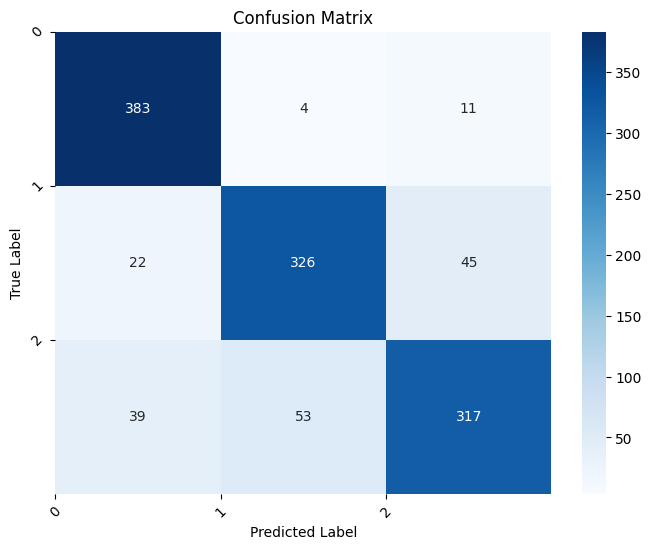

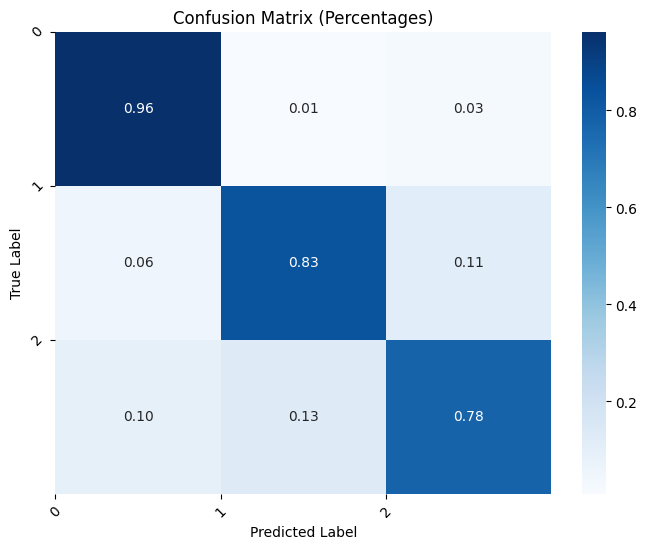

      R1-PA1:VH     R1-PM1:V    R1-PA2:VH     R1-PM2:V  R1-PA3:VH  \
0    -34.377468  130932.6159   -154.36056  130882.4694  85.640002   
1    -34.451952  130932.6159  -154.429315  130907.5427  85.576976   
2    -34.492059  130932.6159  -154.475151  130882.4694   85.53114   
3    -34.555085  130932.6159  -154.532447  130907.5427  85.462385   
4    -34.658217  130957.6892  -154.641309  130882.4694  85.353523   
..          ...          ...          ...          ...        ...   
95  -102.983434  131383.9348   137.040045  131333.7883  17.028306   
96  -104.003299  131183.3486   136.020181  131158.2754  16.008441   
97   -104.67366  131108.1288    135.34982  131083.0556   15.34381   
98  -104.719496  131108.1288   135.298254  131108.1288  15.297973   
99  -104.793981  131158.2754   135.229499  131133.2021  15.223489   

       R1-PM3:V    R1-PA4:IH   R1-PM4:I    R1-PA5:IH   R1-PM5:I  ...  \
0   130982.7625   -38.336606   483.4104  -158.852549  484.50906  ...   
1   130982.7625   -38.53141

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

class GradientBoostingMultiClassifier:
    def __init__(self, train_file, test_file):
        """
        Initialize the GradientBoostingMultiClassifier.

        Parameters:
        - train_file (str): File path of the training data.
        - test_file (str): File path of the testing data.
        """
        self.train_file = train_file
        self.test_file = test_file
        self.model = GradientBoostingClassifier()

    def load_data(self, file):
        """
        Load data from a CSV file, skipping the first row.

        Parameters:
        - file (str): File path for the CSV file.

        Returns:
        - data (DataFrame): Loaded data as a pandas DataFrame.
        """
        # Set the data types for each column
        column_dtypes = [str] * 128  # Set first 128 to strings
        column_dtypes.append(int)  # Set the 129th column (index 128) as int
        data = pd.read_csv(file, sep=',', header=None, dtype=dict(zip(range(129), column_dtypes)), skiprows=1)
        return data

    def split_data(self, data):
        """
        Split features and labels.

        Parameters:
        - data (DataFrame): Input data containing features and labels.

        Returns:
        - X_train, X_test, y_train, y_test (DataFrame): Split features and labels for training and testing.
        """
        X = data.iloc[:, :-1]
        y = data.iloc[:, -1]
        return train_test_split(X, y, test_size=0.2, random_state=42)

    def train(self, X, y):
        """
        Train the classifier.

        Parameters:
        - X (DataFrame): Features for training.
        - y (Series): Labels for training.
        """
        self.model.fit(X, y)

    def evaluate(self, X, y):
        """
        Evaluate the trained model.

        Parameters:
        - X (DataFrame): Features for evaluation.
        - y (Series): True labels for evaluation.
        """
        pred = self.model.predict(X)

        # Print accuracy score and classification report
        print(f'Accuracy Score {accuracy_score(y, pred)}')
        print(classification_report(y, pred))

        # Generate confusion matrix
        conf_matrix = confusion_matrix(y, pred)

        # Extract unique labels from the data
        unique_labels = np.unique(np.concatenate((y, pred)))

        # Plot regular confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
        plt.title('Confusion Matrix')
        plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.yticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Calculate percentages
        conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

        # Plot confusion matrix with percentages
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_percentage, annot=True, cmap='Blues', fmt='.2f')
        plt.title('Confusion Matrix (Percentages)')
        plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.yticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()


    def predict(self, data):
      """
      Make predictions on new data.

      Parameters:
      - data (DataFrame): New data for prediction.

      Returns:
      - predicted_data (DataFrame): DataFrame with predicted labels.
      """
      features = data.copy()
      predictions = self.model.predict(features)
      predictions = predictions.astype(int)  # Convert predictions to integers

      # Get the first header row from the test file
      with open(self.test_file, 'r') as file:
          header_row = file.readline().strip().split(',')

      # Create a new DataFrame for the predicted results
      predicted_data = pd.concat([features, pd.DataFrame(predictions, columns=['marker'])], axis=1)

      # Prepend the header row to the predicted data
      header_row.append('marker')  # Add the "Predicted" column to the header row
      predicted_data.columns = header_row

      predicted_data.to_csv('TestingResultsMulti.csv', index=False)

      print(predicted_data)

      return predicted_data  # Return the DataFrame with the 'Predicted' column

    def run(self):
        """Run the classifier."""
        # Load training data and split into features and labels
        train_data = self.load_data(self.train_file)
        X_train, X_test, y_train, y_test = self.split_data(train_data)

        # Train the classifier
        self.train(X_train, y_train)

        # Evaluate the model on test data
        self.evaluate(X_test, y_test)

        # Load testing data and make predictions
        test_data = self.load_data(self.test_file)
        predicted_data = self.predict(test_data)  # Capture the returned DataFrame

        # Select the 'Predicted' column and write it to a new CSV file
        predicted_column = predicted_data.iloc[:, -1]  # Select the last column
        predicted_values = [str(value) for value in predicted_column if str(value) != 'nan']  # Filter out empty values
        print("Predicted Markers\n" + ', '.join(predicted_values))  # Join with commas

if __name__ == "__main__":
    classifier = GradientBoostingMultiClassifier('TrainingDataMulti.csv', 'TestingDataMulti.csv')
    classifier.run()


---

## **Random Forest Classifier Implementation**

 **WITH THIS METHOD I ACHIEVED AN ACCURACY SCORE OF 96.0%**

Accuracy Score 0.96
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       398
           1       0.96      0.93      0.94       393
           2       0.94      0.96      0.95       409

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



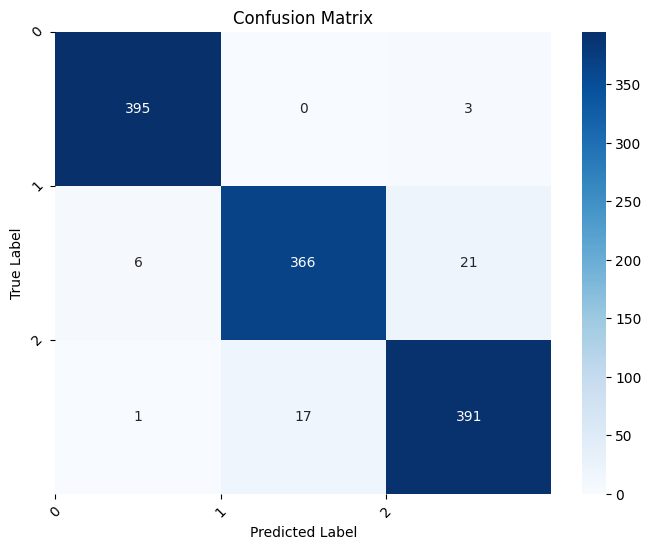

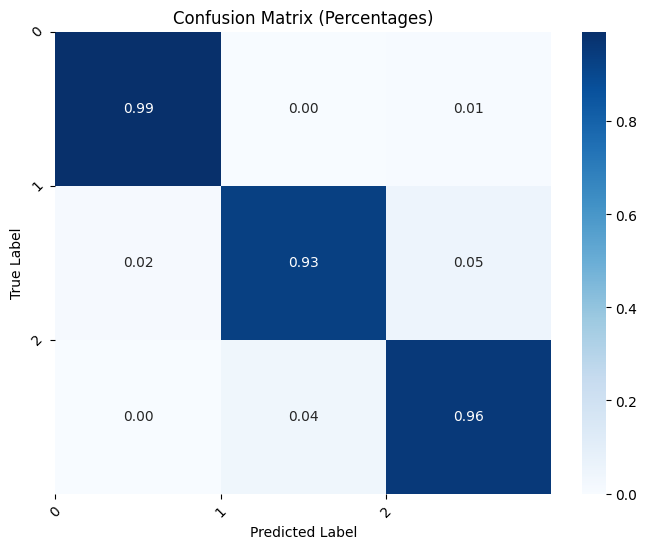

      R1-PA1:VH     R1-PM1:V    R1-PA2:VH     R1-PM2:V  R1-PA3:VH  \
0    -34.377468  130932.6159   -154.36056  130882.4694  85.640002   
1    -34.451952  130932.6159  -154.429315  130907.5427  85.576976   
2    -34.492059  130932.6159  -154.475151  130882.4694   85.53114   
3    -34.555085  130932.6159  -154.532447  130907.5427  85.462385   
4    -34.658217  130957.6892  -154.641309  130882.4694  85.353523   
..          ...          ...          ...          ...        ...   
95  -102.983434  131383.9348   137.040045  131333.7883  17.028306   
96  -104.003299  131183.3486   136.020181  131158.2754  16.008441   
97   -104.67366  131108.1288    135.34982  131083.0556   15.34381   
98  -104.719496  131108.1288   135.298254  131108.1288  15.297973   
99  -104.793981  131158.2754   135.229499  131133.2021  15.223489   

       R1-PM3:V    R1-PA4:IH   R1-PM4:I    R1-PA5:IH   R1-PM5:I  ...  \
0   130982.7625   -38.336606   483.4104  -158.852549  484.50906  ...   
1   130982.7625   -38.53141

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

class Classifier:
    def __init__(self, train_file, test_file):
        """
        Initialize the Classifier.

        Parameters:
        - train_file (str): File path of the training data.
        - test_file (str): File path of the testing data.
        """
        self.train_file = train_file
        self.test_file = test_file
        self.model = RandomForestClassifier()

    def load_data(self, file):
        """
        Load data from a CSV file, skipping the first row.

        Parameters:
        - file (str): File path for the CSV file.

        Returns:
        - data (DataFrame): Loaded data as a pandas DataFrame.
        """
        # Set the data types for each column
        column_dtypes = [str] * 128  # Set first 128 to strings
        column_dtypes.append(int)  # Set the 129th column (index 128) as int
        data = pd.read_csv(file, sep=',', header=None, dtype=dict(zip(range(129), column_dtypes)), skiprows=1)
        return data

    def split_data(self, data):
        """
        Split features and labels.

        Parameters:
        - data (DataFrame): Input data containing features and labels.

        Returns:
        - X_train, X_test, y_train, y_test (DataFrame): Split features and labels for training and testing.
        """
        X = data.iloc[:, :-1]
        y = data.iloc[:, -1]
        return train_test_split(X, y, test_size=0.2, random_state=42)

    def train(self, X, y):
        """
        Train the classifier.

        Parameters:
        - X (DataFrame): Features for training.
        - y (Series): Labels for training.
        """
        self.model.fit(X, y)

    def evaluate(self, X, y):
        """
        Evaluate the trained model.

        Parameters:
        - X (DataFrame): Features for evaluation.
        - y (Series): True labels for evaluation.
        """
        pred = self.model.predict(X)

        # Print accuracy score and classification report
        print(f'Accuracy Score {accuracy_score(y, pred)}')
        print(classification_report(y, pred))

        # Generate confusion matrix
        conf_matrix = confusion_matrix(y, pred)

        # Extract unique labels from the data
        unique_labels = np.unique(np.concatenate((y, pred)))

        # Plot regular confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
        plt.title('Confusion Matrix')
        plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.yticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Calculate percentages
        conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

        # Plot confusion matrix with percentages
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_percentage, annot=True, cmap='Blues', fmt='.2f')
        plt.title('Confusion Matrix (Percentages)')
        plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.yticks(ticks=np.arange(len(unique_labels)), labels=unique_labels, rotation=45)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()


    def predict(self, data):
      """
      Make predictions on new data.

      Parameters:
      - data (DataFrame): New data for prediction.

      Returns:
      - predicted_data (DataFrame): DataFrame with predicted labels.
      """
      features = data.copy()
      predictions = self.model.predict(features)
      predictions = predictions.astype(int)  # Convert predictions to integers

      # Get the first header row from the test file
      with open(self.test_file, 'r') as file:
          header_row = file.readline().strip().split(',')

      # Create a new DataFrame for the predicted results
      predicted_data = pd.concat([features, pd.DataFrame(predictions, columns=['marker'])], axis=1)

      # Prepend the header row to the predicted data
      header_row.append('marker')  # Add the "Predicted" column to the header row
      predicted_data.columns = header_row

      predicted_data.to_csv('TestingResultsMulti.csv', index=False)

      print(predicted_data)

      return predicted_data  # Return the DataFrame with the 'Predicted' column

    def run(self):
        """Run the classifier."""
        # Load training data and split into features and labels
        train_data = self.load_data(self.train_file)
        X_train, X_test, y_train, y_test = self.split_data(train_data)

        # Train the classifier
        self.train(X_train, y_train)

        # Evaluate the model on test data
        self.evaluate(X_test, y_test)

        # Load testing data and make predictions
        test_data = self.load_data(self.test_file)
        predicted_data = self.predict(test_data)  # Capture the returned DataFrame

        # Select the 'Predicted' column and write it to a new CSV file
        predicted_column = predicted_data.iloc[:, -1]  # Select the last column
        predicted_values = [str(value) for value in predicted_column if str(value) != 'nan']  # Filter out empty values
        print("Predicted Markers\n" + ', '.join(predicted_values))  # Join with commas

if __name__ == "__main__":
    classifier = Classifier('TrainingDataMulti.csv', 'TestingDataMulti.csv')
    classifier.run()


---

## **Results and Analysis**

## Accuracy Scores
1. Random Forest Classifier 96.0%
2. Gradient Boosting Classifier 85.5%
3. Decision Tree Classifier 90.25%

# **Best model is:** Random Forest Classifier with an accuracy score of 96.0%